<a href="https://colab.research.google.com/github/SheiLop/ecobici-wifi.io/blob/master/tarea_1_Sheila_Lopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de delitos por violación en CDMX para los años 2017,2018,2019 y 2020**


En los siguientes mapas se trata de mostrar la distribución espacial de los delitos reportados como violación a nivel alcaldia y colonia.

In [0]:
!pip install pandas

In [0]:
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [857 kB]
Get:13 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sources [1,784 kB]
Get:14 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRe

**Importamos los datos del drive creando la ruta de acceso base**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls /content/drive/My\ Drive/Geoinformatica/Tarea_1

agebs_cdmx.geojson
alcaldias.geojson
alcaldias_GM.geojson
Base_Indice_de_marginacion_municipal_90-15.csv
Base_marginacion_AGEB_00-10.csv
carpetas-de-investigacion-pgj-cdmx.geojson
coloniascdmx.geojson
datos.geojson
tarea_1.ipynb


In [0]:
base_path = '/content/drive/My Drive/Geoinformatica/Tarea_1/'
base_path

'/content/drive/My Drive/Geoinformatica/Tarea_1/'

**Importamos las librerias necesarias para realizar los siguientes procedimientos**

In [0]:
import pandas as pd

In [0]:
!pip install geopandas

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import palettable as pltt
from seaborn import palplot

**Cargamos los datos correspondientes a los delitos, esta capa ya se encuentra filtrada por delitos de violación, también cargamos los datos correspondientes a las alcaldías. Los archivos se encuentran en formato GeoJson**


In [0]:
carpeta = gpd.read_file (base_path + 'datos.geojson')
carpeta = carpeta.set_index ('alcaldia_hechos')
carpeta.head()

,id,latitud,mes_hechos,geopoint,calle_hechos,calle_hechos2,unidad_investigacion,categoria_delito,agencia,fecha_inicio,fecha_hechos,longitud,colonia_hechos,delito,fiscalia,ao_hechos,mes_inicio,ao_inicio,geometry
alcaldia_hechos,,,,,,,,,,,,,,,,,,,
TLALPAN,118,NA,Diciembre,None,S/D,NA,FDS-3-01,VIOLACIÓN,FDS-3,2016-01-02 16:35:14,2015-12-31 13:00:00,NA,NA,VIOLACION,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,2015,Enero,2016,None
IZTAPALAPA,942,19.3175019998341,Enero,"(2:19.3175019998,-99.057976)",CRISANTEMO,NA,FDS-5-01,VIOLACIÓN,FDS-5,2016-01-07 23:02:11,2016-01-02 21:00:00,-99.0579759999999,LOMAS DE SAN LORENZO,VIOLACION,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,2016,Enero,2016,POINT (-99.05798 19.31750)
TLAHUAC,1231,19.3129669998342,Enero,"(2:19.3129669998,-99.040329)",SAN LAZARO,NA,FDS-5-01,VIOLACIÓN,FDS-5,2016-01-09 15:39:14,2015-01-07 15:00:00,-99.0403289999999,LA ESTACIÓN,VIOLACION,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,2015,Enero,2016,POINT (-99.04033 19.31297)
TLAHUAC,1232,NA,Enero,None,CASA HACITACION DOMICILIO DE LA DENUNCIANTE A...,NA,FDS-5-01,VIOLACIÓN,FDS-5,2016-01-09 15:58:54,2016-01-09 04:00:00,NA,NA,VIOLACION,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,2016,Enero,2016,None
VENUSTIANO CARRANZA,1793,19.4492749998331,Enero,"(2:19.4492749998,-99.09093300000001)",PENIQUES,CIRCUITO INTERIOR,FDS-3-03,VIOLACIÓN,FDS-3,2016-01-13 13:08:45,2016-01-10 21:00:00,-99.090933,AQUILES SERDÁN,VIOLACION,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,2016,Enero,2016,POINT (-99.09093 19.44927)


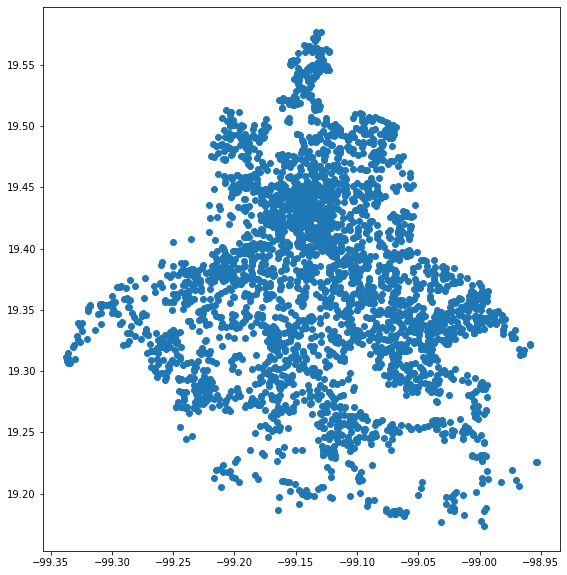

In [0]:
carpeta.plot (figsize = (10,10))

In [0]:
alcaldias = gpd.read_file (base_path + 'alcaldias_GM.geojson')
alcaldias = alcaldias.set_index ('cvegeo')
alcaldias.head()

,nomgeo,cve_mun,cve_ent,pop_tot,analf,gm,geometry
cvegeo,,,,,,,
09015,Cuauhtémoc,015,09,532553,0.85,Muy bajo,"POLYGON ((-99.12919 19.46247, -99.12884 19.462..."
09010,Álvaro Obregón,010,09,749982,1.64,Muy bajo,"POLYGON ((-99.18871 19.39475, -99.18868 19.394..."
09013,Xochimilco,013,09,415933,1.90,Muy bajo,"POLYGON ((-99.09870 19.31964, -99.09849 19.319..."
09011,Tláhuac,011,09,361593,1.93,Muy bajo,"POLYGON ((-98.97893 19.32393, -98.97856 19.323..."
09014,Benito Juárez,014,09,417416,0.67,Muy bajo,"POLYGON ((-99.13679 19.40156, -99.13682 19.401..."


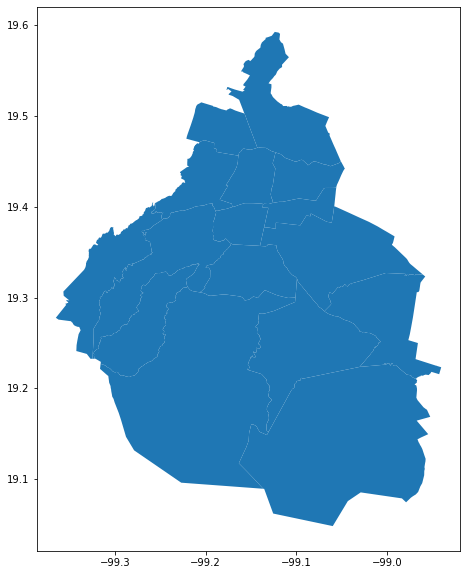

In [0]:
alcaldias.plot (figsize = (10,10))

**De los datos almacenados en la variable carpeta, hacemos un filtrado seleccionando para cada año a analizar: 2017, 2018, 2019 y 2020**

In [0]:
vio17 = carpeta[carpeta["ao_hechos"] == '2017']


In [0]:
vio18 = carpeta[carpeta["ao_hechos"] == '2018']
vio19 = carpeta[carpeta["ao_hechos"] == '2019']
vio20 = carpeta[carpeta["ao_hechos"] == '2020']


**Se realiza la visualización de la distribución de los puntos que representan los delitos por violación en CDMX, estos puntos se encuentran sobre las alcaldias las cuales están simbolizadas por la poplación total según la encuenta intercensal de 2015 de INEGI. La finalidad es observar la relación entre la ocurrencia de este delito y la concentración de la población por alcaldías.
Se observa que los años con mayor número de delitos por violación son 2018 y 2019, esto considerando que para 2020 solo se tomaron los meses de enero y febrero.**

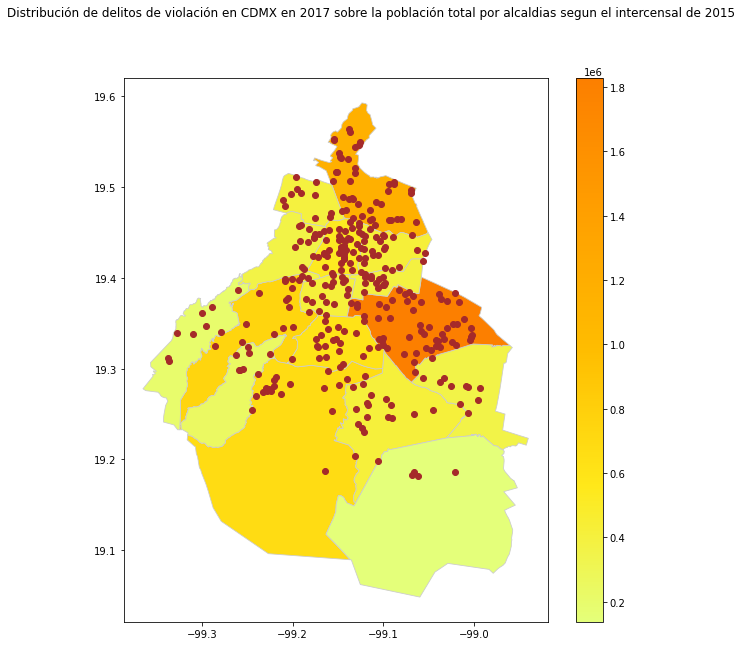

In [0]:
fig , filas = plt.subplots(1, figsize = (10,10))
alcaldias.plot(ax = filas, column = 'pop_tot', cmap='Wistia',linewidth=0.8, edgecolor='0.8', legend = True);
vio17.plot(ax = filas, color = 'brown')
fig.suptitle("Distribución de delitos de violación en CDMX en 2017 sobre la población total por alcaldias segun el intercensal de 2015")
plt.show()

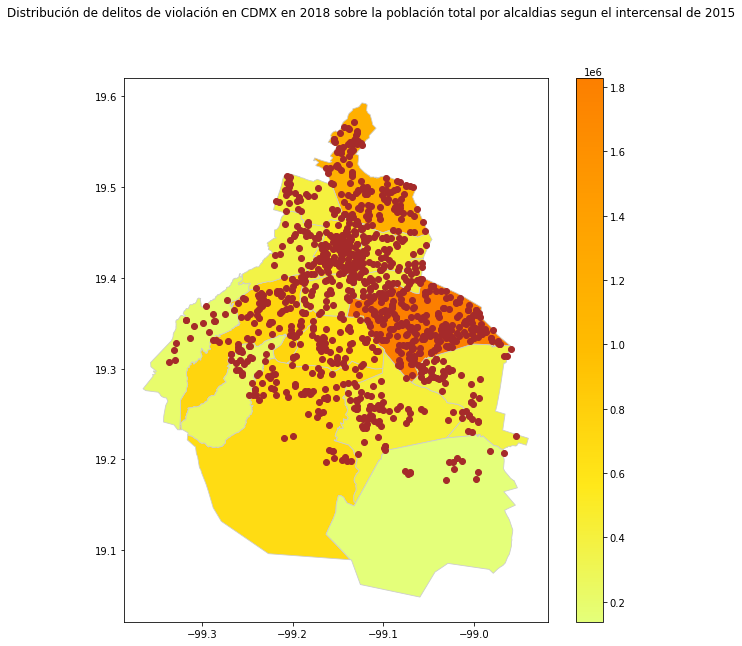

In [0]:
fig , filas = plt.subplots(1, figsize = (10,10))
alcaldias.plot(ax = filas, column = 'pop_tot', cmap='Wistia',linewidth=0.8, edgecolor='0.8', legend = True);
vio18.plot(ax = filas, color = 'brown')
fig.suptitle("Distribución de delitos de violación en CDMX en 2018 sobre la población total por alcaldias segun el intercensal de 2015")
plt.show()

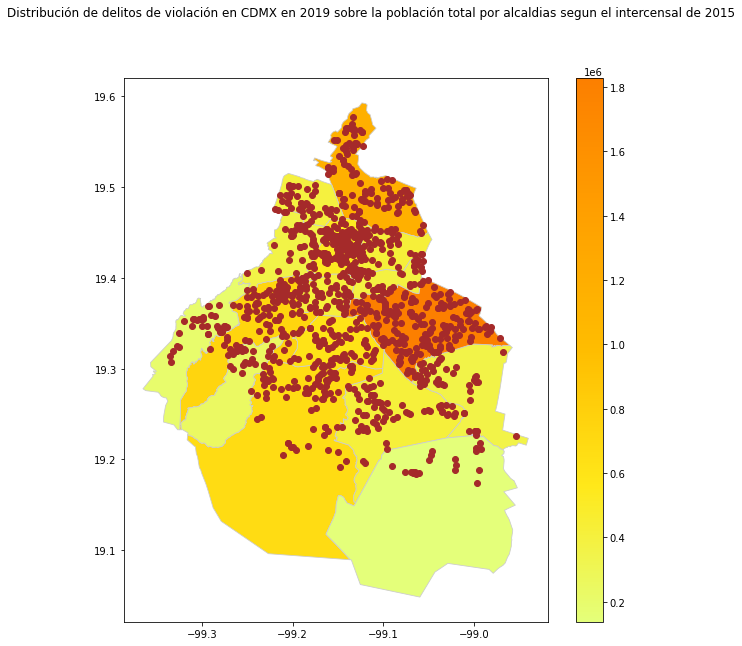

In [0]:
fig , filas = plt.subplots(1, figsize = (10,10))
alcaldias.plot(ax = filas, column = 'pop_tot', cmap='Wistia',linewidth=0.8, edgecolor='0.8', legend = True);
vio19.plot(ax = filas, color = 'brown')
fig.suptitle("Distribución de delitos de violación en CDMX en 2019 sobre la población total por alcaldias segun el intercensal de 2015")
plt.show()

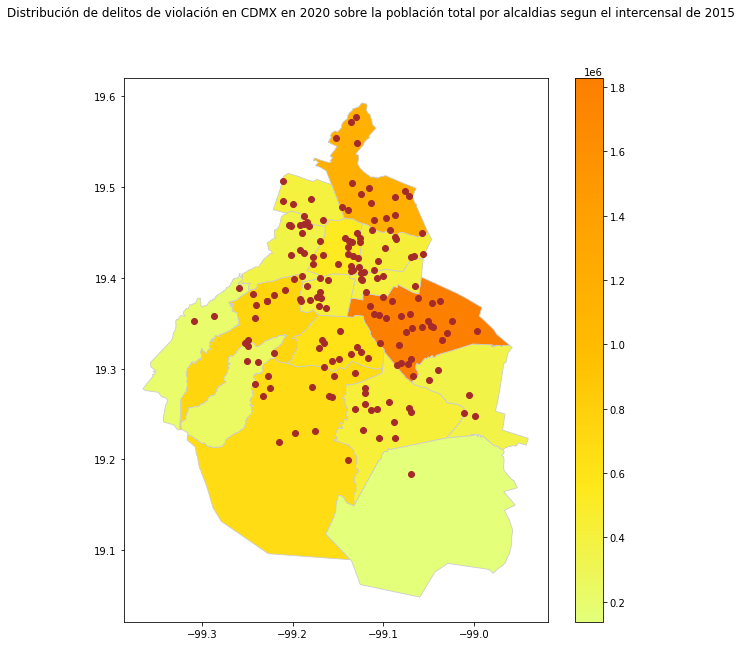

In [0]:
fig , filas = plt.subplots(1, figsize = (10,10))
alcaldias.plot(ax = filas, column = 'pop_tot', cmap='Wistia',linewidth=0.8, edgecolor='0.8', legend = True);
vio20.plot(ax = filas, color = 'brown')
fig.suptitle("Distribución de delitos de violación en CDMX en 2020 sobre la población total por alcaldias segun el intercensal de 2015")
plt.show()

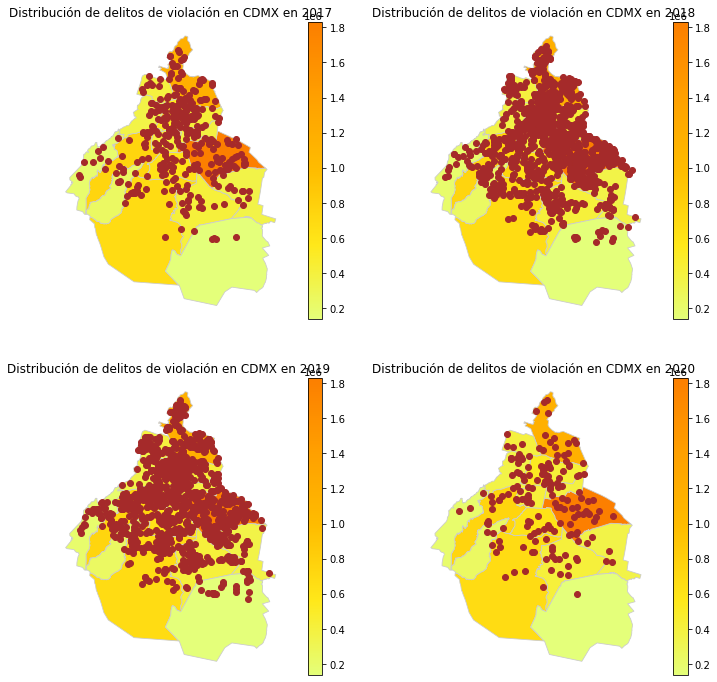

In [0]:
fig = plt.figure( figsize=(12,12))
axs = fig.subplots (nrows = 2, ncols=2)
ax1= axs.flat[0]
ax2= axs.flat[1]
ax3= axs.flat[2]
ax4= axs.flat[3]


alcaldias.plot(ax = ax1, column = 'pop_tot', cmap='Wistia',linewidth=0.8, edgecolor='0.8', legend = True);
vio17.plot(ax = ax1, color = 'brown')
ax1.set_axis_off()
ax1.axis('equal')
ax1.set_title('Distribución de delitos de violación en CDMX en 2017')

alcaldias.plot(ax=ax2,column = 'pop_tot', cmap='Wistia',linewidth=0.8, edgecolor='0.8', legend = True);
vio18.plot(ax = ax2, color = 'brown')
ax2.set_axis_off()
ax2.axis('equal')
ax2.set_title('Distribución de delitos de violación en CDMX en 2018 ')

alcaldias.plot(ax=ax3,column = 'pop_tot', cmap='Wistia',linewidth=0.8, edgecolor='0.8', legend = True);
vio19.plot(ax = ax3, color = 'brown')
ax3.set_axis_off()
ax3.axis('equal')
ax3.set_title('Distribución de delitos de violación en CDMX en 2019 ')

alcaldias.plot(ax=ax4,column = 'pop_tot', cmap='Wistia',linewidth=0.8, edgecolor='0.8', legend = True);
vio20.plot(ax = ax4, color = 'brown')
ax4.set_axis_off()
ax4.axis('equal')
ax4.set_title('Distribución de delitos de violación en CDMX en 2020 ')
plt.show()

**Para continuar, realizamos la unión de las tablas y realizamos la agrupación por alcaldias. 
Los siguientes mapas muestran cuales son las alcaldias con mayor número de delitos por violación en los diferentes años. Mostrando una tendencia clara sobre las alcaldias con mayor número de violaciones.
En 2017 las alcaldias con mayor número de delitos por violación reportados con carpeta de investigación son: Gustavo A. Madero, Cuauhtémoc e Iztapalapa. Para 2018, las cifras aumentan alcanzando aproximadamente 225 hechos de violación. Se mantienen las 3 alcaldias de 2017 agregandose la alcaldia Álvaro Obregón. En 2019 se ve ligero incremento en la mayoría de las alcaldías, sin embargo resaltan nuevamente las mencionadas para 2018. En los meses que van de 2020 se tienen más de 25 registros por este delito.**

In [0]:
union = gpd.sjoin(alcaldias, vio17, how="left") # Unión de las tablas
union.head()

,nomgeo,cve_mun,cve_ent,pop_tot,analf,gm,geometry,index_right,id,latitud,mes_hechos,geopoint,calle_hechos,calle_hechos2,unidad_investigacion,categoria_delito,agencia,fecha_inicio,fecha_hechos,longitud,colonia_hechos,delito,fiscalia,ao_hechos,mes_inicio,ao_inicio
cvegeo,,,,,,,,,,,,,,,,,,,,,,,,,,
09015,Cuauhtémoc,015,09,532553,0.85,Muy bajo,"POLYGON ((-99.12919 19.46247, -99.12884 19.462...",CUAUHTEMOC,64836,19.4337078611359,Octubre,"(2:19.4337078611,-99.1468539796)",AV. INDEPENDENCIA,AV. BALDERAS,UI-1CD,VIOLACIÓN,TLP-3,2017-10-14 23:34:57,2017-10-13 23:00:00,-99.1468539796086,CENTRO,VIOLACION,INVESTIGACIÓN EN TLALPAN,2017,Octubre,2017
09015,Cuauhtémoc,015,09,532553,0.85,Muy bajo,"POLYGON ((-99.12919 19.46247, -99.12884 19.462...",CUAUHTEMOC,102137,19.4346111961304,Noviembre,"(2:19.4346111961,-99.1431916664)",AV. JUAREZ,None,FDS-6-03,VIOLACIÓN,FDS-6,2018-04-17 11:45,2017-11-24 22:30,-99.1431916664481,CENTRO,VIOLACION,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,2017,Abril,2018
09015,Cuauhtémoc,015,09,532553,0.85,Muy bajo,"POLYGON ((-99.12919 19.46247, -99.12884 19.462...",CUAUHTEMOC,39143,19.4346757492091,Julio,"(2:19.4346757492,-99.1432861637)",PLAZA JUAREZ,AVENIDA JUAREZ,FDS-6-01,VIOLACIÓN,FDS-6,2017-07-04 18:20:21,2017-07-04 01:00:00,-99.1432861637171,CENTRO,VIOLACION TUMULTUARIA,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,2017,Julio,2017
09015,Cuauhtémoc,015,09,532553,0.85,Muy bajo,"POLYGON ((-99.12919 19.46247, -99.12884 19.462...",CUAUHTEMOC,729397,19.4354732998339,Febrero,"(2:19.4354732998,-99.1431369)",ALAMEDA CENTRAL,NA,FDS-1-01,VIOLACIÓN,FDS-1,2017-02-16 13:44:50,2017-02-16 11:30:00,-99.1431369,CENTRO,VIOLACION,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,2017,Febrero,2017
09015,Cuauhtémoc,015,09,532553,0.85,Muy bajo,"POLYGON ((-99.12919 19.46247, -99.12884 19.462...",CUAUHTEMOC,318970,19.4371403112265,Diciembre,"(2:19.4371403112,-99.1294239082)",REPUBLICA DE VENEZUELA,EL CARMEN,FDS-1-02,VIOLACIÓN,FDS-1,2017-12-23 08:58:30,2017-12-23 07:00:00,-99.1294239082062,CENTRO,VIOLACION,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,2017,Diciembre,2017


In [0]:
union = union.fillna(value=0)

In [0]:
union_agrupado = union.groupby('nomgeo').count()[['categoria_delito']].rename({'idalcaldia':'no_robos'}, axis=1) # Hago el conteo de robos por alcaldía
union_agrupado.head()

,categoria_delito
nomgeo,
Azcapotzalco,11
Benito Juárez,18
Coyoacán,23
Cuajimalpa de Morelos,9
Cuauhtémoc,43


In [0]:
union_agrupado_geom = alcaldias[['geometry', 'nomgeo', 'cve_mun']].join(union_agrupado, on='nomgeo', rsuffix="r")
union_agrupado_geom.head()

,geometry,nomgeo,cve_mun,categoria_delito
cvegeo,,,,
09015,"POLYGON ((-99.12919 19.46247, -99.12884 19.462...",Cuauhtémoc,015,43
09010,"POLYGON ((-99.18871 19.39475, -99.18868 19.394...",Álvaro Obregón,010,15
09013,"POLYGON ((-99.09870 19.31964, -99.09849 19.319...",Xochimilco,013,17
09011,"POLYGON ((-98.97893 19.32393, -98.97856 19.323...",Tláhuac,011,11
09014,"POLYGON ((-99.13679 19.40156, -99.13682 19.401...",Benito Juárez,014,18


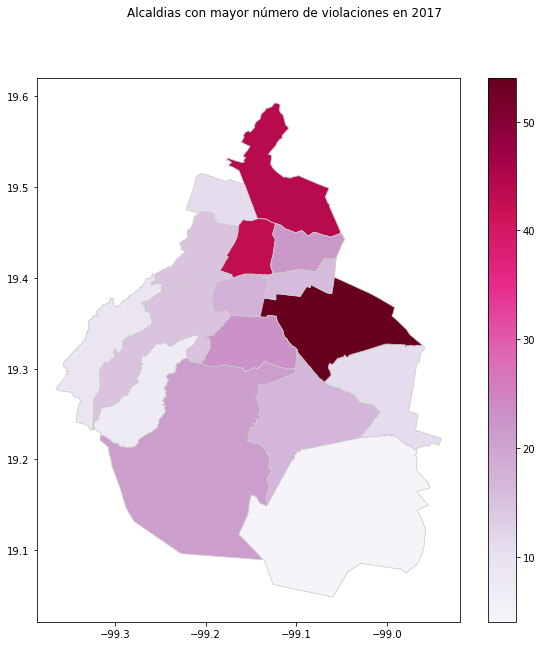

In [0]:
fig, ax = plt.subplots(1, figsize=(10, 10))
union_agrupado_geom.plot(column='categoria_delito', cmap='PuRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True);
fig.suptitle("Alcaldias con mayor número de violaciones en 2017")
fig.show()

In [0]:
union18 = gpd.sjoin(alcaldias, vio18, how="left") # Unión de las tablas para 2018
union18 = union18.fillna(value=0)


In [0]:
union_agrupado18 = union18.groupby('nomgeo').count()[['categoria_delito']].rename({'idalcaldia':'no_robos'}, axis=1) # Hago el conteo de robos por alcaldía
union_agrupado18.head()

,categoria_delito
nomgeo,
Azcapotzalco,30
Benito Juárez,33
Coyoacán,55
Cuajimalpa de Morelos,17
Cuauhtémoc,131


In [0]:
union_agrupado_geom18 = alcaldias[['geometry', 'nomgeo', 'cve_mun']].join(union_agrupado18, on='nomgeo', rsuffix="r")
union_agrupado_geom18.head()

,geometry,nomgeo,cve_mun,categoria_delito
cvegeo,,,,
09015,"POLYGON ((-99.12919 19.46247, -99.12884 19.462...",Cuauhtémoc,015,131
09010,"POLYGON ((-99.18871 19.39475, -99.18868 19.394...",Álvaro Obregón,010,83
09013,"POLYGON ((-99.09870 19.31964, -99.09849 19.319...",Xochimilco,013,63
09011,"POLYGON ((-98.97893 19.32393, -98.97856 19.323...",Tláhuac,011,52
09014,"POLYGON ((-99.13679 19.40156, -99.13682 19.401...",Benito Juárez,014,33


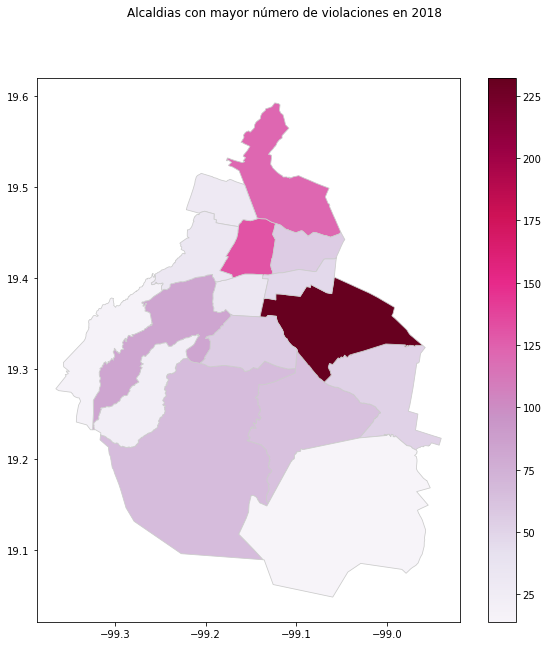

In [0]:
fig, ax = plt.subplots(1, figsize=(10, 10))
union_agrupado_geom18.plot(column='categoria_delito', cmap='PuRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True);
fig.suptitle("Alcaldias con mayor número de violaciones en 2018")
fig.show()

In [0]:
union19 = gpd.sjoin(alcaldias, vio19, how="left") # Unión de las tablas para 2019
union19 = union19.fillna(value=0)


In [0]:
union_agrupado19 = union19.groupby('nomgeo').count()[['categoria_delito']].rename({'idalcaldia':'no_robos'}, axis=1) # Hago el conteo de robos por alcaldía
union_agrupado19.head()

,categoria_delito
nomgeo,
Azcapotzalco,43
Benito Juárez,50
Coyoacán,68
Cuajimalpa de Morelos,33
Cuauhtémoc,128


In [0]:
union_agrupado_geom19 = alcaldias[['geometry', 'nomgeo', 'cve_mun']].join(union_agrupado19, on='nomgeo', rsuffix="r")
union_agrupado_geom19.head()

,geometry,nomgeo,cve_mun,categoria_delito
cvegeo,,,,
09015,"POLYGON ((-99.12919 19.46247, -99.12884 19.462...",Cuauhtémoc,015,128
09010,"POLYGON ((-99.18871 19.39475, -99.18868 19.394...",Álvaro Obregón,010,103
09013,"POLYGON ((-99.09870 19.31964, -99.09849 19.319...",Xochimilco,013,65
09011,"POLYGON ((-98.97893 19.32393, -98.97856 19.323...",Tláhuac,011,40
09014,"POLYGON ((-99.13679 19.40156, -99.13682 19.401...",Benito Juárez,014,50


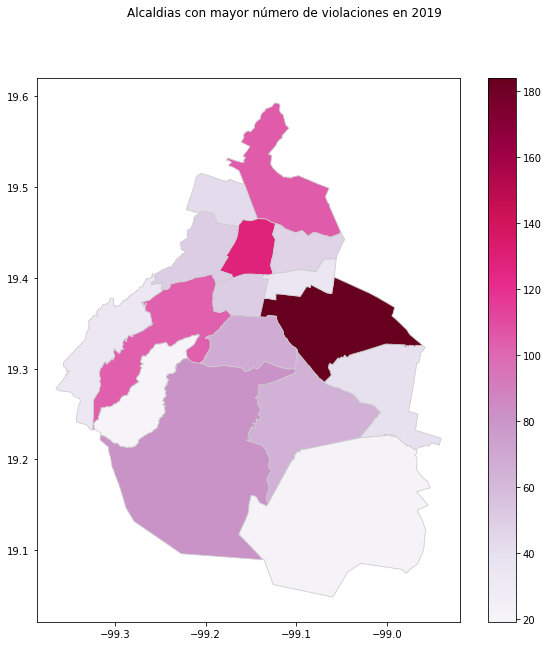

In [0]:
fig, ax = plt.subplots(1, figsize=(10, 10))
union_agrupado_geom19.plot(column='categoria_delito', cmap='PuRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True);
fig.suptitle("Alcaldias con mayor número de violaciones en 2019")
fig.show()

In [0]:
union20 = gpd.sjoin(alcaldias, vio20, how="left") # Unión de las tablas para 2020
union20 = union20.fillna(value=0)

In [0]:
union_agrupado20 = union20.groupby('nomgeo').count()[['categoria_delito']].rename({'idalcaldia':'no_robos'}, axis=1) # Hago el conteo de robos por alcaldía
union_agrupado20.head()

,categoria_delito
nomgeo,
Azcapotzalco,7
Benito Juárez,10
Coyoacán,11
Cuajimalpa de Morelos,3
Cuauhtémoc,16


In [0]:
union_agrupado_geom20 = alcaldias[['geometry', 'nomgeo', 'cve_mun']].join(union_agrupado20, on='nomgeo', rsuffix="r")
union_agrupado_geom20.head()

,geometry,nomgeo,cve_mun,categoria_delito
cvegeo,,,,
09015,"POLYGON ((-99.12919 19.46247, -99.12884 19.462...",Cuauhtémoc,015,16
09010,"POLYGON ((-99.18871 19.39475, -99.18868 19.394...",Álvaro Obregón,010,12
09013,"POLYGON ((-99.09870 19.31964, -99.09849 19.319...",Xochimilco,013,14
09011,"POLYGON ((-98.97893 19.32393, -98.97856 19.323...",Tláhuac,011,4
09014,"POLYGON ((-99.13679 19.40156, -99.13682 19.401...",Benito Juárez,014,10


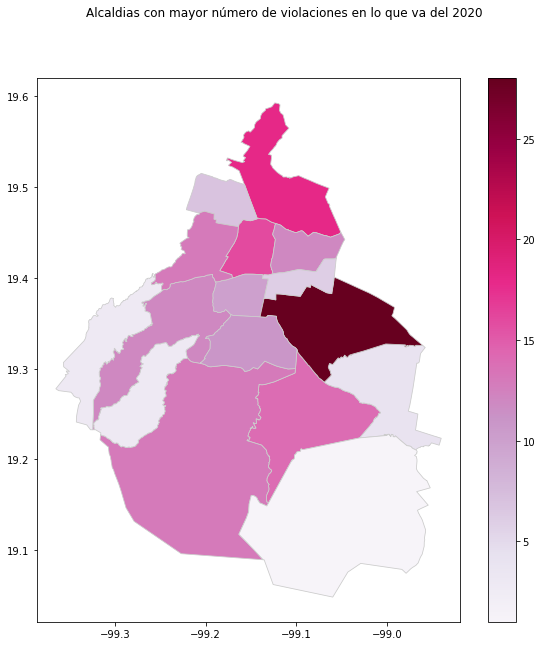

In [0]:
fig, ax = plt.subplots(1, figsize=(10, 10))
union_agrupado_geom20.plot(column='categoria_delito', cmap='PuRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True);
fig.suptitle("Alcaldias con mayor número de violaciones en lo que va del 2020")
fig.show()

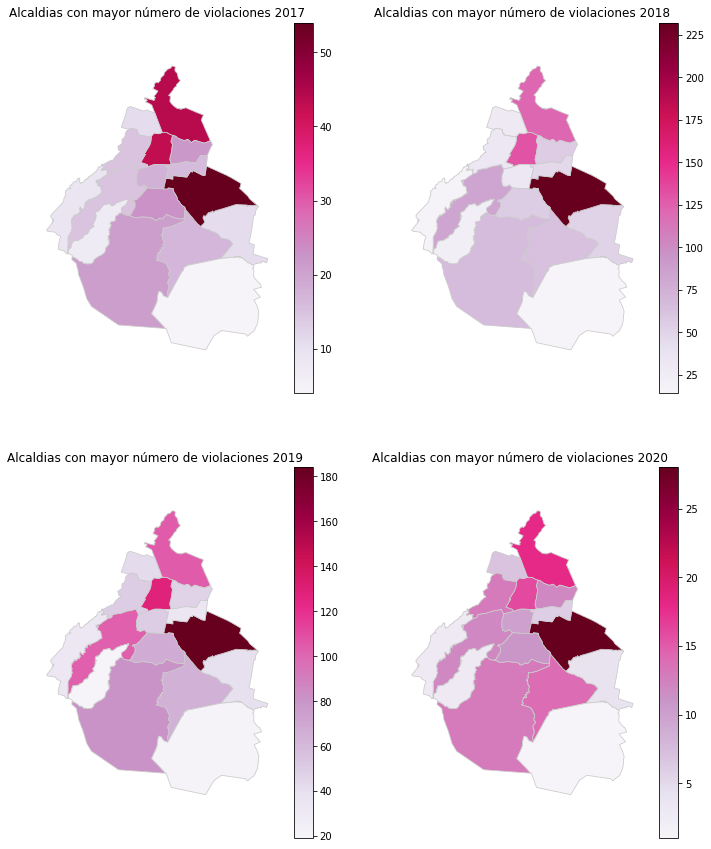

In [0]:
fig2 = plt.figure(1, figsize=(12,15))
axs = fig2.subplots (nrows = 2, ncols=2)
ax1= axs.flat[0]
ax2= axs.flat[1]
ax3= axs.flat[2]
ax4= axs.flat[3]


union_agrupado_geom.plot(column='categoria_delito', cmap='PuRd', linewidth=0.8, ax=ax1, edgecolor='0.8', legend = True);
ax1.set_axis_off()
ax1.axis('equal')
ax1.set_title('Alcaldias con mayor número de violaciones 2017')

union_agrupado_geom18.plot(column='categoria_delito', cmap='PuRd', linewidth=0.8, ax=ax2, edgecolor='0.8', legend = True);
ax2.set_axis_off()
ax2.axis('equal')
ax2.set_title('Alcaldias con mayor número de violaciones 2018')

union_agrupado_geom19.plot(column='categoria_delito', cmap='PuRd', linewidth=0.8, ax=ax3, edgecolor='0.8', legend = True);
ax3.set_axis_off()
ax3.axis('equal')
ax3.set_title('Alcaldias con mayor número de violaciones 2019 ')

union_agrupado_geom20.plot(column='categoria_delito', cmap='PuRd', linewidth=0.8, ax=ax4, edgecolor='0.8', legend = True);
ax4.set_axis_off()
ax4.axis('equal')
ax4.set_title('Alcaldias con mayor número de violaciones 2020 ')
plt.show()

In [0]:
colonias = gpd.read_file (base_path + 'coloniascdmx.geojson')
colonias = colonias.set_index ('cve_col')
colonias.head()

,entidad,cve_alc,alcaldia,secc_com,secc_par,nombre,geometry
cve_col,,,,,,,
16-035,9.0,16,MIGUEL HIDALGO,"5079, 5080, 5083, 5102","5068, 5082",IRRIGACION,"POLYGON ((-99.21158 19.44840, -99.21098 19.448..."
16-049,9.0,16,MIGUEL HIDALGO,"5137, 5182",None,MARINA NACIONAL (U HAB),"POLYGON ((-99.17978 19.44810, -99.17876 19.447..."
03-144,9.0,3,COYOACAN,"381, 394, 494, 416, 417, 439",None,PEDREGAL DE STO DOMINGO VI,"POLYGON ((-99.16226 19.32966, -99.16208 19.329..."
03-121,9.0,3,COYOACAN,None,"474, 475",VILLA PANAMERICANA 7MA. SECCIN (U HAB),"POLYGON ((-99.16765 19.30674, -99.16660 19.304..."
03-120,9.0,3,COYOACAN,None,458,VILLA PANAMERICANA 6TA. SECCIN (U HAB),"POLYGON ((-99.17028 19.31224, -99.16952 19.312..."


**Por último, el nivel de análisis se cambió por colonias. El primer mapa muestra las colonias de la CDMX simbolizadas por la alcaldia a la que pertenece. 
Posteriormente, para cada año se realiza una intersección seleccionando así unicamente las colonias que presentan algún evento.**

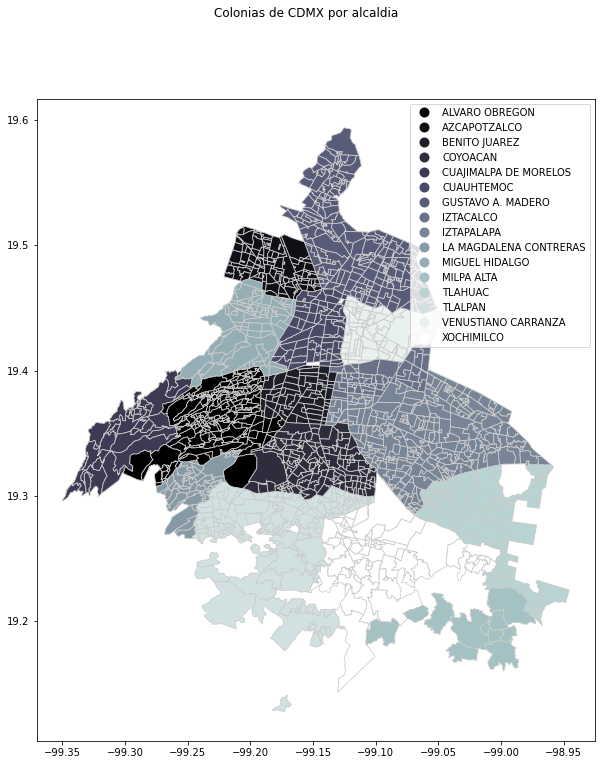

In [0]:
fig, ax = plt.subplots(1, figsize=(10, 12))
colonias.plot(column='alcaldia', cmap='bone', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True);
fig.suptitle("Colonias de CDMX por alcaldia")
fig.show()

In [0]:
points_clean = vio17[vio17.geometry.type == 'Point']

In [0]:
colonias_clean = colonias[colonias.geometry.type == 'Polygon']

In [0]:
union_colonias17= gpd.sjoin(colonias_clean,points_clean, how = 'inner', op='intersects')
union_colonias17.head()

,entidad,cve_alc,alcaldia,secc_com,secc_par,nombre,geometry,index_right,id,latitud,mes_hechos,geopoint,calle_hechos,calle_hechos2,unidad_investigacion,categoria_delito,agencia,fecha_inicio,fecha_hechos,longitud,colonia_hechos,delito,fiscalia,ao_hechos,mes_inicio,ao_inicio
cve_col,,,,,,,,,,,,,,,,,,,,,,,,,,
03-035,9.0,3,COYOACAN,"720, 721, 745",None,CUADRANTE DE SAN FRANCISCO,"POLYGON ((-99.15972 19.34274, -99.15997 19.342...",COYOACAN,332882,19.3437707735756,Enero,"(2:19.3437707736,-99.1608375559)",ESPIRITU SANTO,MIGUEL ANGEL DE QUEVEDO,FDS-2-03,VIOLACIÓN,FDS-2,2017-01-10 11:49:28,2017-01-10 02:00:00,-99.1608375559127,CUADRANTE DE SAN FRANCISCO,VIOLACION,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,2017,Enero,2017
05-074,9.0,5,GUSTAVO A. MADERO,"1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124","1102, 1125",GUADALUPE TEPEYAC,"POLYGON ((-99.12394 19.46782, -99.12390 19.467...",GUSTAVO A MADERO,351603,19.4677870812782,Marzo,"(2:19.4677870813,-99.1237547209)",REFFOCARRIL INDIUSTRIAL,CALZDA DE GUADALUPE,FDS-4-02,VIOLACIÓN,FDS-4,2017-03-19 08:08:32,2017-03-19 06:30:00,-99.123754720946,GUADALUPE TEPEYAC,VIOLACION,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,2017,Marzo,2017
05-076,9.0,5,GUSTAVO A. MADERO,"1488, 1489","1491, 1492, 1493",GUADALUPE VICTORIA II,"POLYGON ((-99.13896 19.46990, -99.13960 19.469...",GUSTAVO A MADERO,41904,19.4732932114217,Mayo,"(2:19.4732932114,-99.1455722604)",AV. CUITLAHUAC,AV. VALLEJO,FDS-6-03,VIOLACIÓN,FDS-6,2017-05-01 17:30:46,2017-05-01 02:00:00,-99.1455722604454,DEFENSORES DE LA REPÚBLICA,VIOLACION,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,2017,Mayo,2017
05-224,9.0,5,GUSTAVO A. MADERO,"1091, 1093, 1094, 1108, 1109, 1112, 1127, 1128","1129, 1079, 1092",INDUSTRIAL II,"POLYGON ((-99.12824 19.48062, -99.12813 19.480...",GUSTAVO A MADERO,156005,19.4809413229422,Septiembre,"(2:19.4809413229,-99.1277514776)",AVENIDA EUZKARO,AVENIDA INSURGENTES NORTE,FDS-4-02,VIOLACIÓN,FDS-4,2017-09-15 18:47:16,2017-09-14 01:40:00,-99.1277514776068,TEPEYAC INSURGENTES,VIOLACION,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,2017,Septiembre,2017
05-237,9.0,5,GUSTAVO A. MADERO,"1330, 1337, 5538, 5539, 5540, 5541, 5542, 5543",None,SAN FELIPE DE JESUS I,"POLYGON ((-99.07327 19.50193, -99.07259 19.501...",GUSTAVO A MADERO,273106,19.4968049918891,Febrero,"(2:19.4968049919,-99.0696410608)",TEPATITLAN,NA,FDS-6-03,VIOLACIÓN,FDS-6,2017-04-07 10:30:14,2017-02-16 20:30:00,-99.0696410608179,SAN FELIPE DE JESÚS,VIOLACION,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,2017,Abril,2017


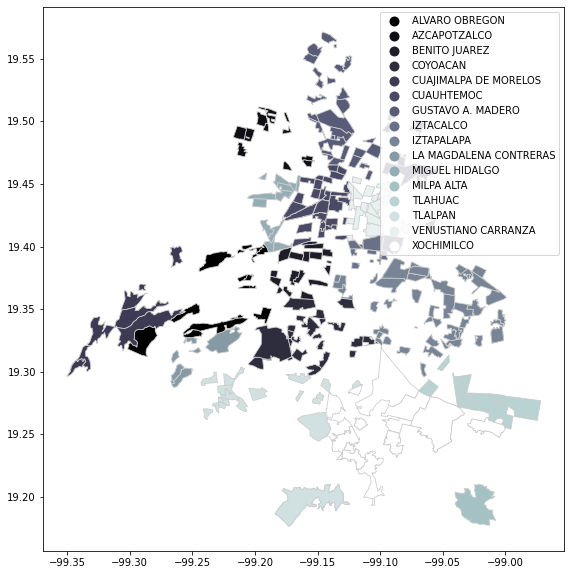

In [0]:
points_clean = vio17[vio17.geometry.type == 'Point']
union_colonias17= gpd.sjoin(colonias_clean,points_clean, how = 'inner', op='intersects')

fig, fila = plt.subplots(1, figsize=(10,10))
union_colonias17.plot(column='alcaldia', cmap='bone', linewidth=0.8, ax=fila, edgecolor='0.8', legend = True)
plt.show()

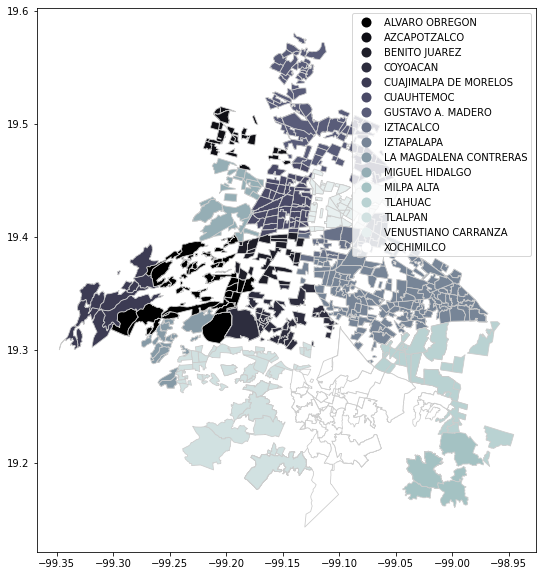

In [0]:
points18 = vio18[vio18.geometry.type == 'Point']
union_colonias17= gpd.sjoin(colonias_clean,points18, how = 'inner', op='intersects')

fig, fila = plt.subplots(1, figsize=(10,10))
union_colonias18.plot(column='alcaldia', cmap='bone', linewidth=0.8, ax=fila, edgecolor='0.8', legend = True)
plt.show()

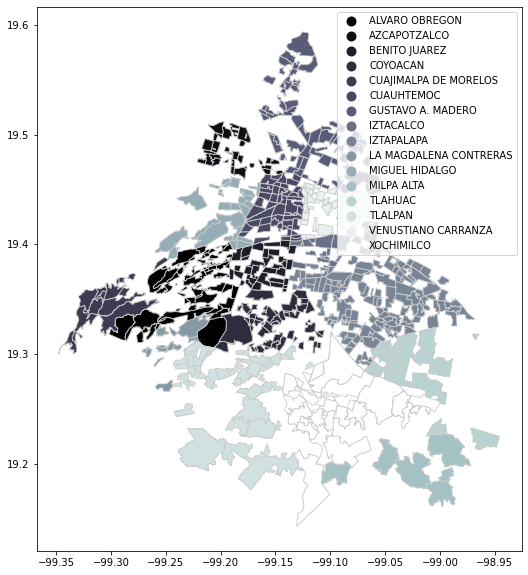

In [0]:
points19 = vio19[vio19.geometry.type == 'Point']
union_colonias19= gpd.sjoin(colonias_clean,points19, how = 'inner', op='intersects')

fig, fila = plt.subplots(1, figsize=(10,10))
union_colonias19.plot(column='alcaldia', cmap='bone', linewidth=0.8, ax=fila, edgecolor='0.8', legend = True)
plt.show()

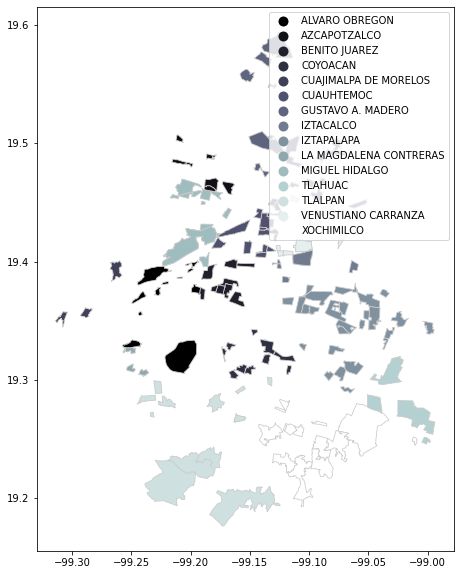

In [0]:
points20 = vio20[vio20.geometry.type == 'Point']
union_colonias20= gpd.sjoin(colonias_clean,points20, how = 'inner', op='intersects')

fig, fila = plt.subplots(1, figsize=(10,10))
union_colonias20.plot(column='alcaldia', cmap='bone', linewidth=0.8, ax=fila, edgecolor='0.8', legend = True)
plt.show()

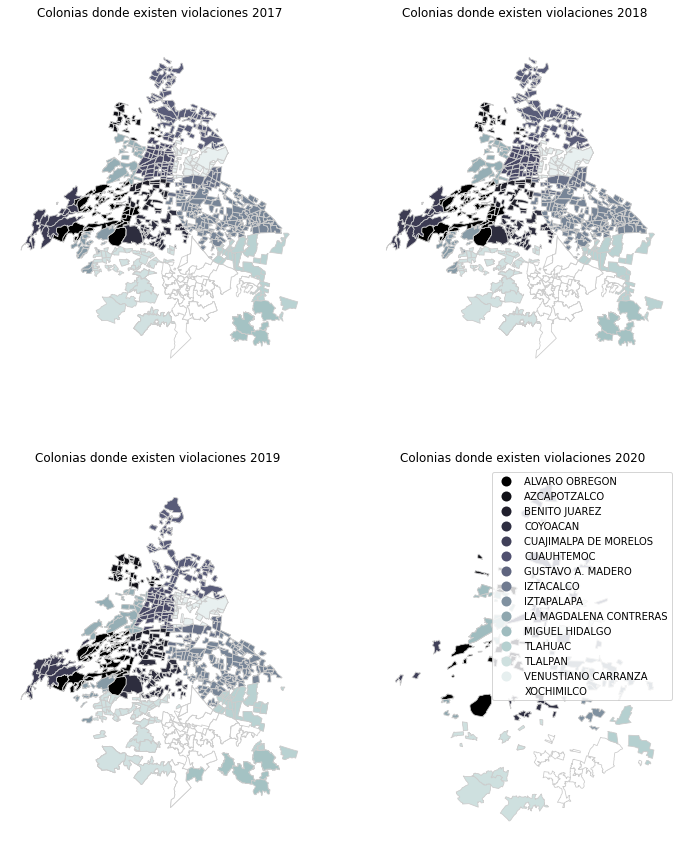

In [0]:
fig3 = plt.figure(1, figsize=(12,15))
axs = fig3.subplots (nrows = 2, ncols=2)
ax1= axs.flat[0]
ax2= axs.flat[1]
ax3= axs.flat[2]
ax4= axs.flat[3]


union_colonias17.plot(column='alcaldia', cmap='bone', linewidth=0.8, ax=ax1, edgecolor='0.8', legend = False)
ax1.set_axis_off()
ax1.axis('equal')
ax1.set_title('Colonias donde existen violaciones 2017')

union_colonias18.plot(column='alcaldia', cmap='bone', linewidth=0.8, ax=ax2, edgecolor='0.8', legend = False)
ax2.set_axis_off()
ax2.axis('equal')
ax2.set_title('Colonias donde existen violaciones 2018')

union_colonias19.plot(column='alcaldia', cmap='bone', linewidth=0.8, ax=ax3, edgecolor='0.8', legend = False)
ax3.set_axis_off()
ax3.axis('equal')
ax3.set_title('Colonias donde existen violaciones 2019 ')

union_colonias20.plot(column='alcaldia', cmap='bone', linewidth=0.8, ax=ax4, edgecolor='0.8', legend = True)
ax4.set_axis_off()
ax4.axis('equal')
ax4.set_title('Colonias donde existen violaciones 2020 ')
plt.show()